In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('subwayfee.xls',sheet_name=3, encoding='cp949')
df.shape

(598, 53)

In [4]:
df=df.drop(0) #0번행을 날림

In [6]:
df.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25


In [ ]:
#출근시간대에 가장 많이 타고 내리는 역은 어딜까
#출근 시간대는 언제인가 정의해야함
#상위 10개역
#타는역/ 내리는역

In [21]:
출근시작위치=4
출근시간끝위치=13
df=df.replace(',','',regex=True)
arr=np.array(df)
arr.shape

역별승차인원=arr[:,출근시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원=arr[:,출근시작위치+1:출근시간끝위치+1:2].astype(np.int)
역별승차인원합=np.sum(역별승차인원, axis=1)
역별하차인원합=np.sum(역별하차인원, axis=1)
역별승차인원합[0],역별하차인원합[0]

(162732, 425823)

In [26]:
역이름=arr[:,3]

In [27]:
threshold = np.sort(역별승차인원합)[-10]
mask=역별승차인원합>threshold #mask
역별하차인원합[mask],역이름[mask]


(array([374685, 150637, 149879, 397532, 221675,  95938,  65515,  65234,
         52712]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '화곡', '까치산'], dtype=object))

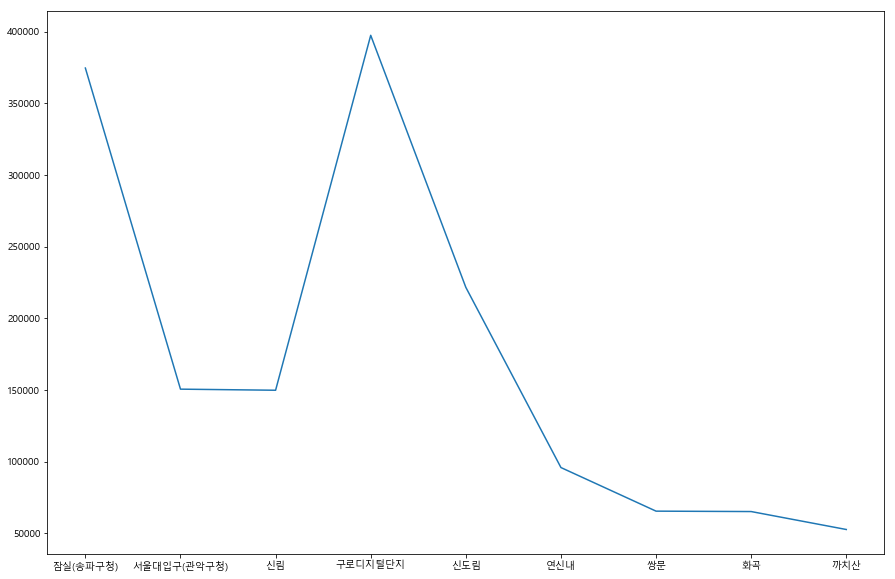

In [30]:
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(15,10))   
m= plt.plot(역이름[mask],역별하차인원합[mask])

In [47]:
#밤 11시에 사람들이 가장 많이 타는 역은 어디일까요 오늘의 과제
승차23시=arr[:,-10].astype(np.int)
승차23시,승차23시.shape
max_승차=np.argmax(승차23시)
arr[max_승차,1],arr[max_승차,3],np.max(승차23시)

('2호선', '신림', 117456)